In [290]:
#Kütüphane ve verilerin yüklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk("C:\Lib\fifa_players.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [291]:
#Veriyi değiştirmeden saklamak için bir yedeğinin alınması bu yedek üzerinde çalışılacak.
df = df_ = pd.read_csv(filepath_or_buffer="C:\\Lib\\fifa_players.csv")
df = df_.copy()

In [292]:
#Programı kötü etkileyecek verilerin çıkarılması
df = df.drop(columns=['national_team_position','national_jersey_number','national_team','national_rating'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [293]:
print(df.isnull().sum())

print("Toplam null değerler:", df.isnull().sum().sum())

name                                0
full_name                           0
birth_date                          0
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                        255
wage_euro                         246
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
release_clause_euro              1837
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve                               0
freekick_accuracy                   0
long_passing

In [294]:
df = df.drop(columns=['full_name','name','birth_date'])

categorical_to_nums = {'preferred_foot'  :   {'Left'  : 0, 'Right' : 1,},
                       'body_type'  :   {'Lean'  : 0, 'Normal' : 1, 'Stocky' : 2}} 
for column, mapping in categorical_to_nums.items():
    temp_series = df[column].copy()
    null_mask = temp_series.isnull()
    temp_series.loc[~null_mask] = temp_series.loc[~null_mask].map(mapping) 
    df[column] = temp_series.fillna(-1).astype('int64')

C:\Users\redoe\AppData\Local\Temp\ipykernel_19092\3298406956.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = temp_series.fillna(-1).astype('int64')
C:\Users\redoe\AppData\Local\Temp\ipykernel_19092\3298406956.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = temp_series.fillna(-1).astype('int64')


In [295]:
df['positions'].nunique()

890

In [296]:
df['positions'] = df['positions'].str.split(',').str[0]
df['positions'].nunique()

15

In [297]:
for column in ['height_cm', 'weight_kgs', 'overall_rating', 'potential', 
               'value_euro', 'wage_euro', 'crossing', 'finishing', 'heading_accuracy', 
               'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 
               'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 
               'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
               'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 
               'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle','international_reputation(1-5)',
               'weak_foot(1-5)', 'skill_moves(1-5)','release_clause_euro']:
    
    # Pozisyonlara göre gruplandırarak medyan ile doldurma işlemi
    df[column] = df.groupby('positions')[column].transform(lambda x: x.fillna(x.median()))

In [298]:
for column in ['preferred_foot','body_type']:
    
        # Pozisyonlara göre gruplandırarak mod ile doldurma işlemi
    df[column] = df.groupby('positions')[column].transform(lambda x: x.fillna(x.mode()[0]))

In [299]:
print(df.isnull().sum())

print("Toplam null değerler:", df.isnull().sum().sum())

age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
release_clause_euro              0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions           

In [300]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['positions_encoded'] = encoder.fit_transform(df['positions'])


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   positions                      17954 non-null  object 
 4   nationality                    17954 non-null  object 
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   value_euro                     17954 non-null  float64
 8   wage_euro                      17954 non-null  float64
 9   preferred_foot                 17954 non-null  int64  
 10  international_reputation(1-5)  17954 non-null  int64  
 11  weak_foot(1-5)                 17954 non-null  int64  
 12  skill_moves(1-5)               17954 non-null 

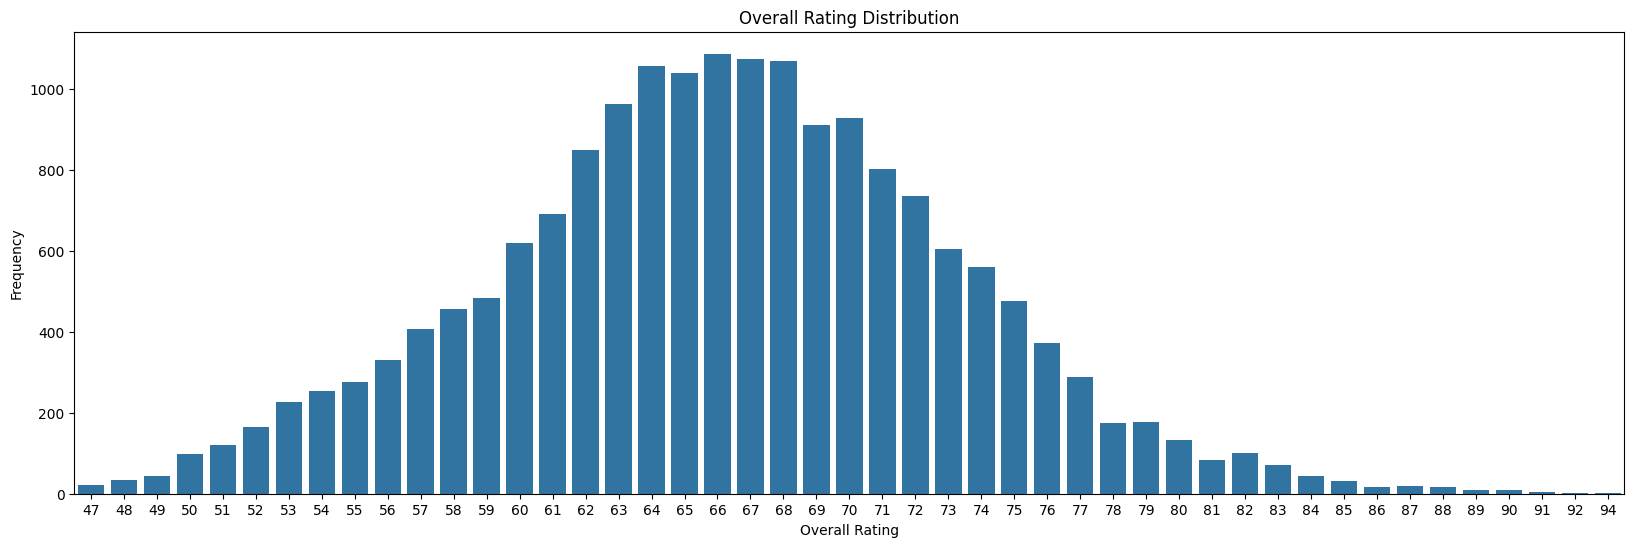

In [302]:
plt.figure(figsize=(20,6))
# Countplot
sns.countplot(x='overall_rating', data=df)

#description
plt.title('Overall Rating Distribution')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

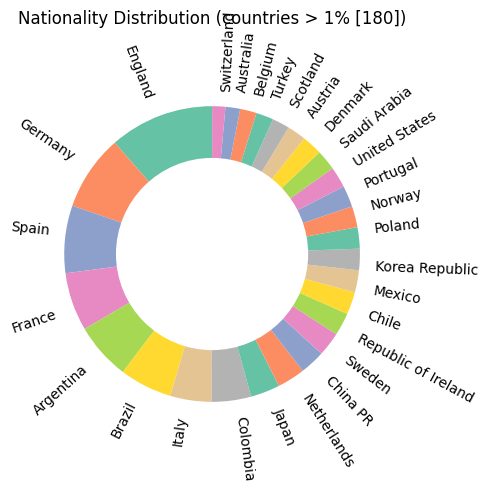

In [303]:
# Pie chart data
table1 = df['nationality'].value_counts()
table1_filtered = table1[table1 >= 180]
x = table1_filtered
labels = table1_filtered.index.values
colors = sns.color_palette('Set2')

# Plot the pie chart with rotated labels
plt.pie(x=x, labels=labels, colors=colors, startangle=90, rotatelabels=True)

# Add a hole in the pie
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

# Adjust the distance between the title and the chart
plt.title('Nationality Distribution (countries > 1% [180])', y=1.1)
plt.show()

df = df.drop(columns=['nationality'])

In [304]:
import plotly.express as px
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 25, 30, 35, 40, 100], labels=['<20', '21-25', '26-30', '31-35', '36-40', '>40'])

# Creating a boxplot
fig_age_group = px.box(df, x='age_group', y='value_euro', title='Market Value Distribution by Age Groups')
fig_age_group.update_layout(xaxis_title='Age Group', yaxis_title='Market Value (Euro)')
fig_age_group.show()

C:\Users\redoe\AppData\Local\Temp\ipykernel_19092\2428118408.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




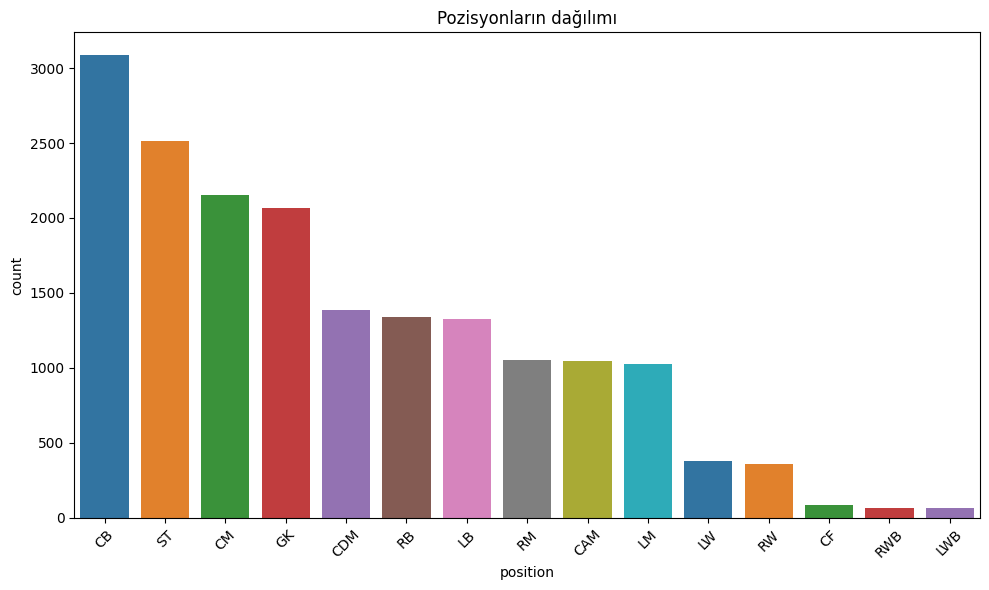

In [305]:
positions_counts=df['positions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=positions_counts.index, y=positions_counts.values, palette="tab10")
plt.title("Pozisyonların dağılımı")
plt.xlabel("position")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [306]:
def shorten_number(x, pos):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.2f}B'  # Milyar
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.2f}M'  # Milyon
    elif x >= 1_000:
        return f'{x / 1_000:.2f}K'  # Bin
    else:
        return str(x)

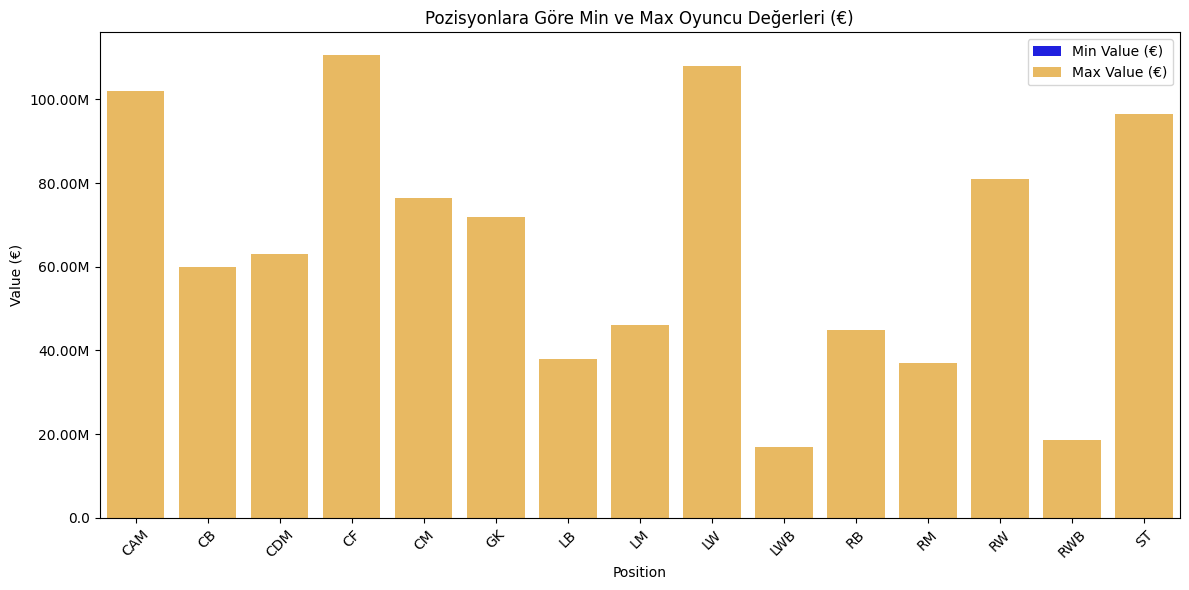

C:\Users\redoe\AppData\Local\Temp\ipykernel_19092\1619302853.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




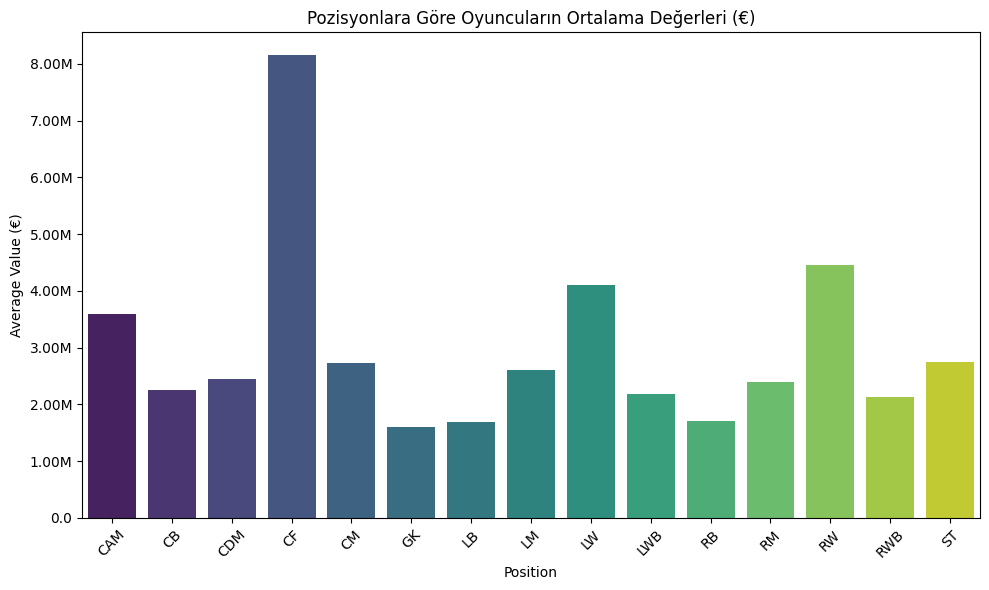

In [307]:
min_values = df.groupby('positions')['value_euro'].min()
max_values = df.groupby('positions')['value_euro'].max()
min_max_df = pd.DataFrame({'Min Value (€)': min_values, 'Max Value (€)': max_values})
plt.figure(figsize=(12, 6))
sns.barplot(data=min_max_df.reset_index(), x='positions', y='Min Value (€)', color='blue', label='Min Value (€)')
sns.barplot(data=min_max_df.reset_index(), x='positions', y='Max Value (€)', color='orange', label='Max Value (€)', alpha=0.7)
plt.title("Pozisyonlara Göre Min ve Max Oyuncu Değerleri (€)")
plt.xlabel("Position")
plt.ylabel("Value (€)")
formatter = ticker.FuncFormatter(shorten_number)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

average_values = df.groupby('positions')['value_euro'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="positions", y="value_euro",data=average_values, palette="viridis")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))
plt.title("Pozisyonlara Göre Oyuncuların Ortalama Değerleri (€)")
plt.xlabel("Position")
plt.ylabel("Average Value (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

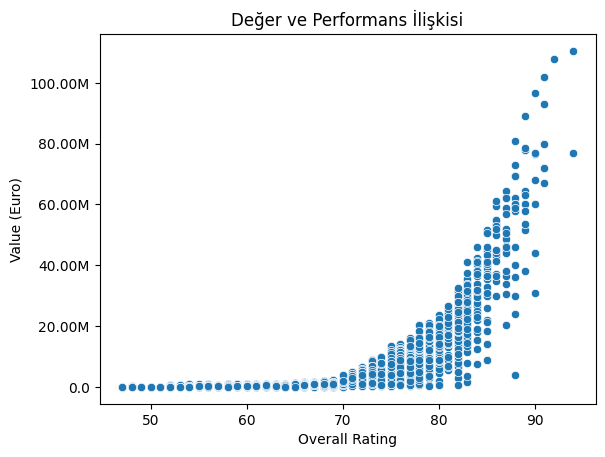

Değer ile overall_rating arasındaki korelasyon: 0.6263937177737772


In [308]:
top_players = df.sort_values(by=['overall_rating','potential'], ascending=False).head(10)
value_performance_corr = df[['value_euro', 'overall_rating']].corr().iloc[0, 1]
sns.scatterplot(data=df, x='overall_rating', y='value_euro')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))
plt.title("Değer ve Performans İlişkisi")
plt.xlabel("Overall Rating")
plt.ylabel("Value (Euro)")
plt.show()
print('Değer ile overall_rating arasındaki korelasyon:',value_performance_corr)

In [309]:
features=['height_cm', 'weight_kgs', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 
'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle','international_reputation(1-5)',
'weak_foot(1-5)', 'skill_moves(1-5)']
#feature ayrımı pozisyonlara göre
def_feature = ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions', 'aggression', 'strength']
mid_feature = ['short_passing', 'dribbling', 'ball_control', 'vision', 'composure', 'reactions', 'long_passing']
atk_feature = ['finishing', 'positioning', 'shot_power', 'heading_accuracy', 'volleys', 'penalties','strength', 'jumping','dribbling']
physical_feature = ['height_cm', 'weight_kgs','strength', 'agility', 'jumping', 'balance', 'stamina','age','weak_foot(1-5)']

df['physical'] = (df["strength"] + df["agility"] + df["age"] + df["stamina"] +df["jumping"] + df["balance"] + df["weak_foot(1-5)"]+ df["height_cm"]+ df["weight_kgs"])/9

df['def'] = (df["sliding_tackle"] + df["standing_tackle"] + df["interceptions"] + df["marking"] +df["strength"] + df["aggression"])/6

df["mid"] = (df["ball_control"] + df["short_passing"] + df["long_passing"] + df["composure"] +df["vision"] + df["dribbling"]+ df["reactions"])/7

df["atk"] = (df["finishing"] + df["volleys"] +df["heading_accuracy"]+df["positioning"]+df["shot_power"]+df["penalties"]+df["strength"]+df["jumping"]+df["dribbling"])/9

def_positions = ['CB', 'RM', 'LB']
mid_positions = ['CM', 'CDM', 'CAM']
atk_positions = ['ST', 'CF', 'RW', 'LW']
physical_positions = ['RB', 'LB', 'CB', 'RM', 'LM','CM','CDM', 'CAM','ST','CF','RW', 'LW']

In [310]:
def calc_and_plot_correlation(data, title):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

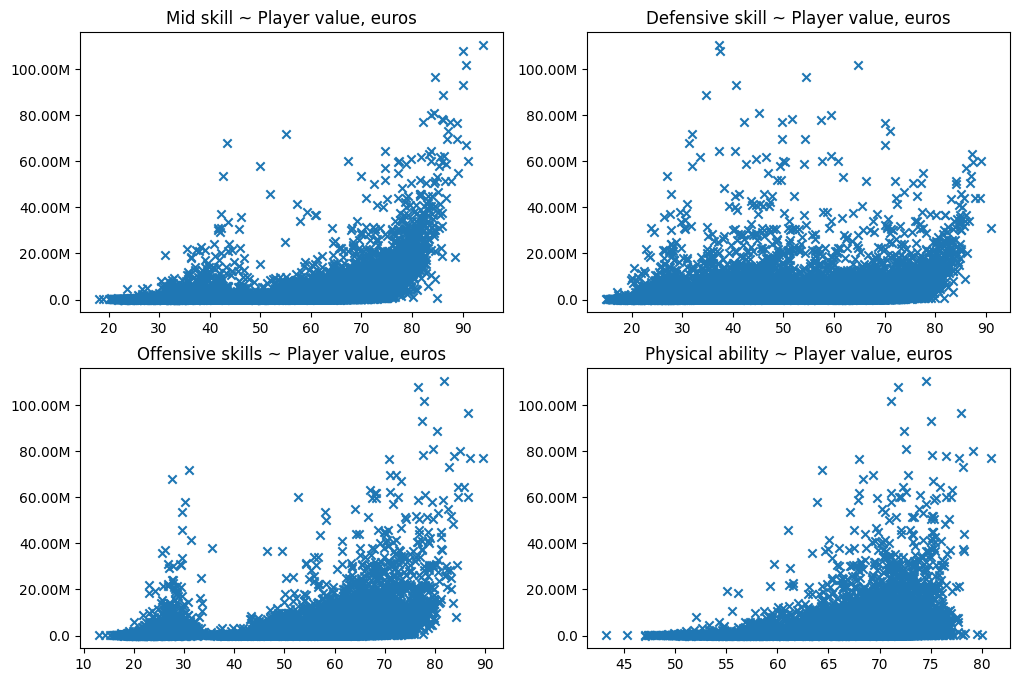

In [311]:
figure, axis = plt.subplots(2, 2, figsize = (12,8))
axis[0,0].scatter(x=df["mid"], y = df["value_euro"], marker = 'x')
axis[0,0].set_title("Mid skill ~ Player value, euros")
axis[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))

axis[0,1].scatter(x=df['def'], y = df["value_euro"], marker = 'x')
axis[0,1].set_title("Defensive skill ~ Player value, euros")
axis[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))

axis[1,0].scatter(x=df["atk"], y = df["value_euro"], marker = 'x')
axis[1,0].set_title("Offensive skills ~ Player value, euros")
axis[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))

axis[1,1].scatter(x=df['physical'], y = df["value_euro"], marker = 'x')
axis[1,1].set_title("Physical ability ~ Player value, euros")
axis[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))

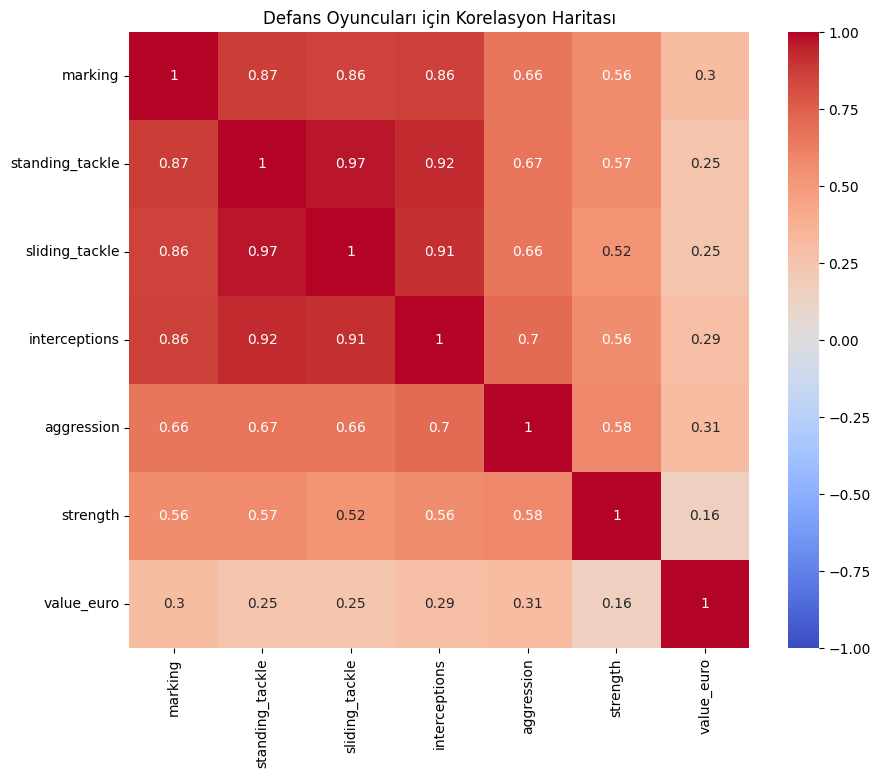

In [312]:
def_players = df[df['positions'].isin(def_positions)][def_feature + ['value_euro']]
calc_and_plot_correlation(def_players, "Defans Oyuncuları için Korelasyon Haritası")

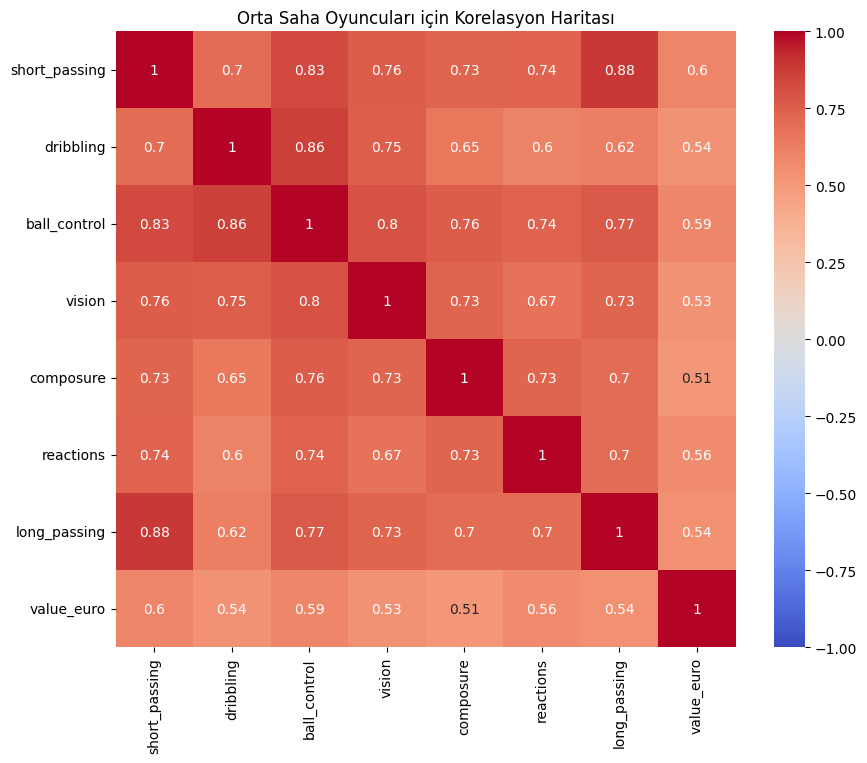

In [313]:
mid_players = df[df['positions'].isin(mid_positions)][mid_feature + ['value_euro']]
calc_and_plot_correlation(mid_players, "Orta Saha Oyuncuları için Korelasyon Haritası")


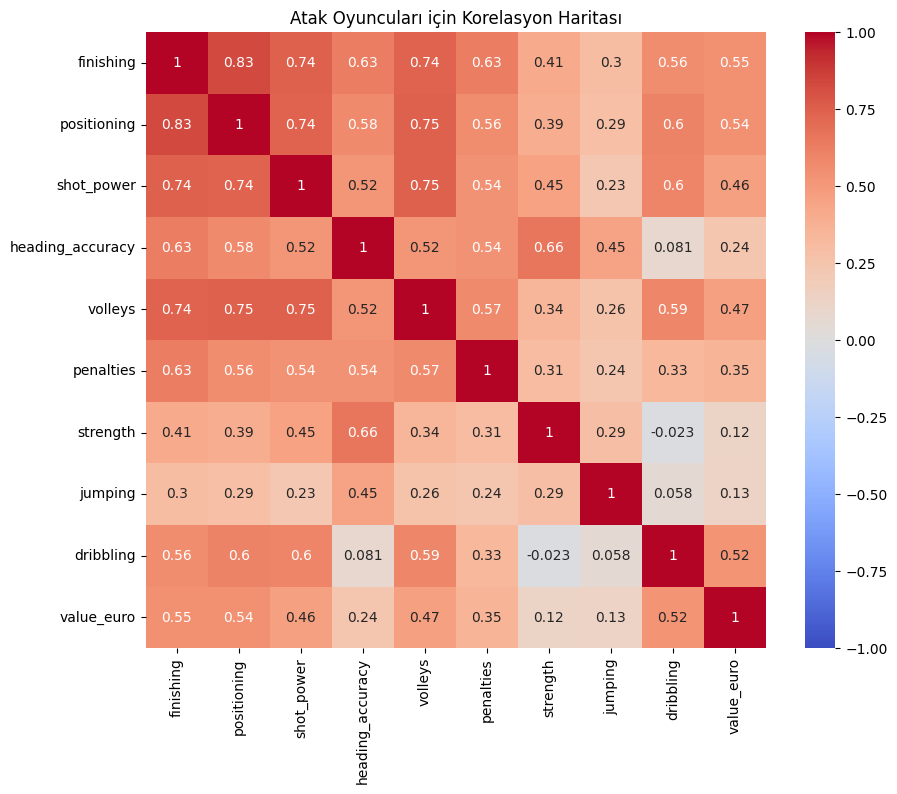

In [314]:
atk_players = df[df['positions'].isin(atk_positions)][atk_feature + ['value_euro']]
calc_and_plot_correlation(atk_players, "Atak Oyuncuları için Korelasyon Haritası")

C:\Users\redoe\AppData\Local\Temp\ipykernel_19092\1500020516.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




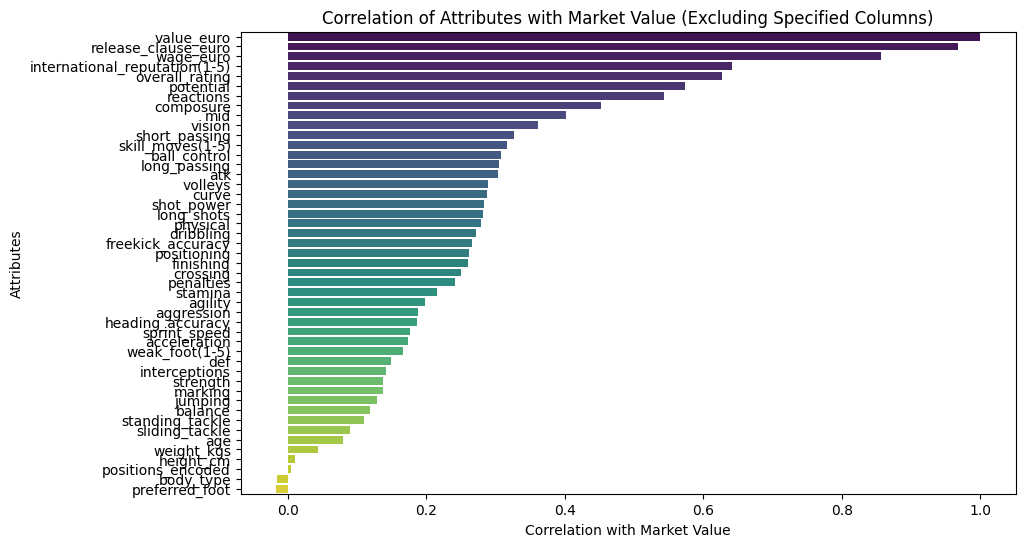

In [315]:
import seaborn as sns
correlation = df.corr(numeric_only=True)['value_euro'].sort_values(ascending=False)

# Plot the correlation of attributes with market value
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.xlabel('Correlation with Market Value')
plt.ylabel('Attributes')
plt.title('Correlation of Attributes with Market Value (Excluding Specified Columns)')
plt.show()

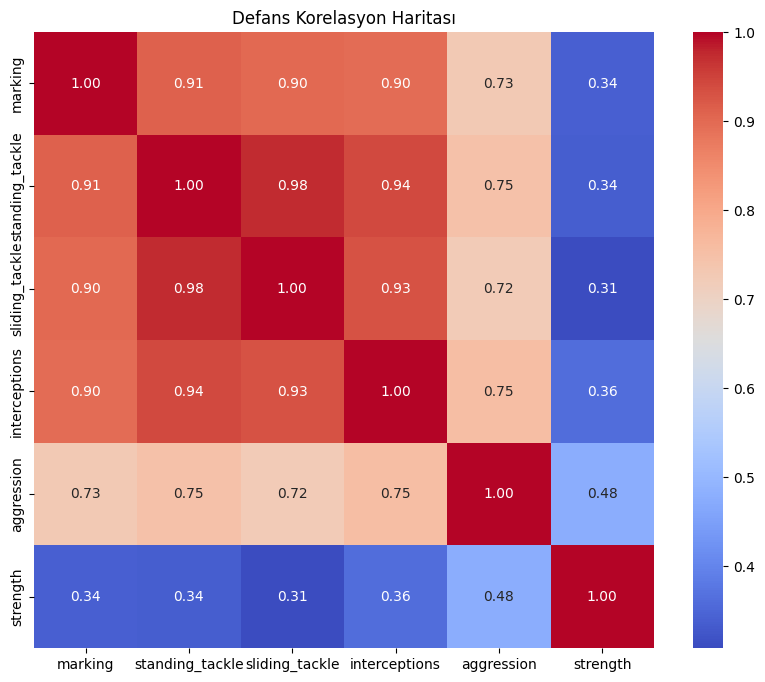

In [316]:
plt.figure(figsize=(10,8))
sns.heatmap(df[def_feature].corr(),annot=True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Defans Korelasyon Haritası")
plt.show()

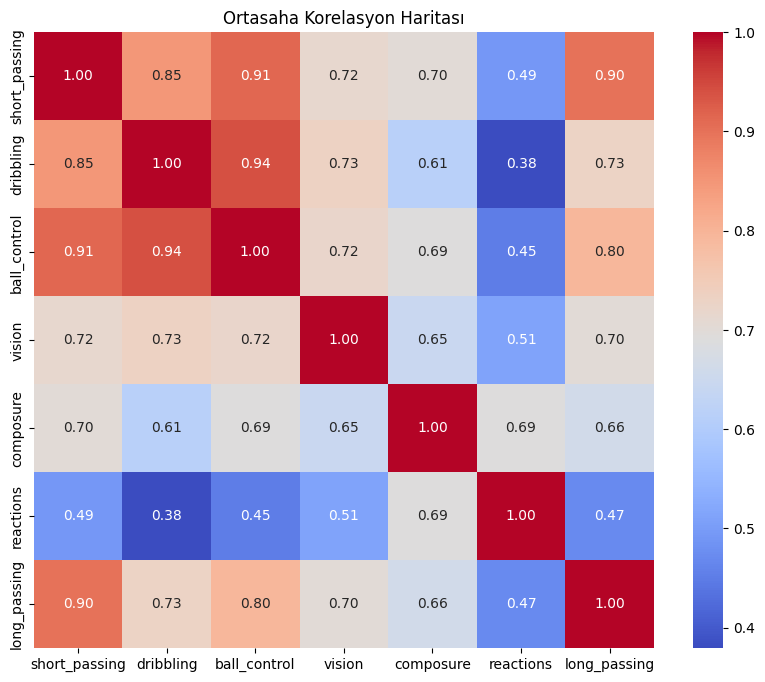

In [317]:
plt.figure(figsize=(10,8))
sns.heatmap(df[mid_feature].corr(),annot=True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Ortasaha Korelasyon Haritası")
plt.show()

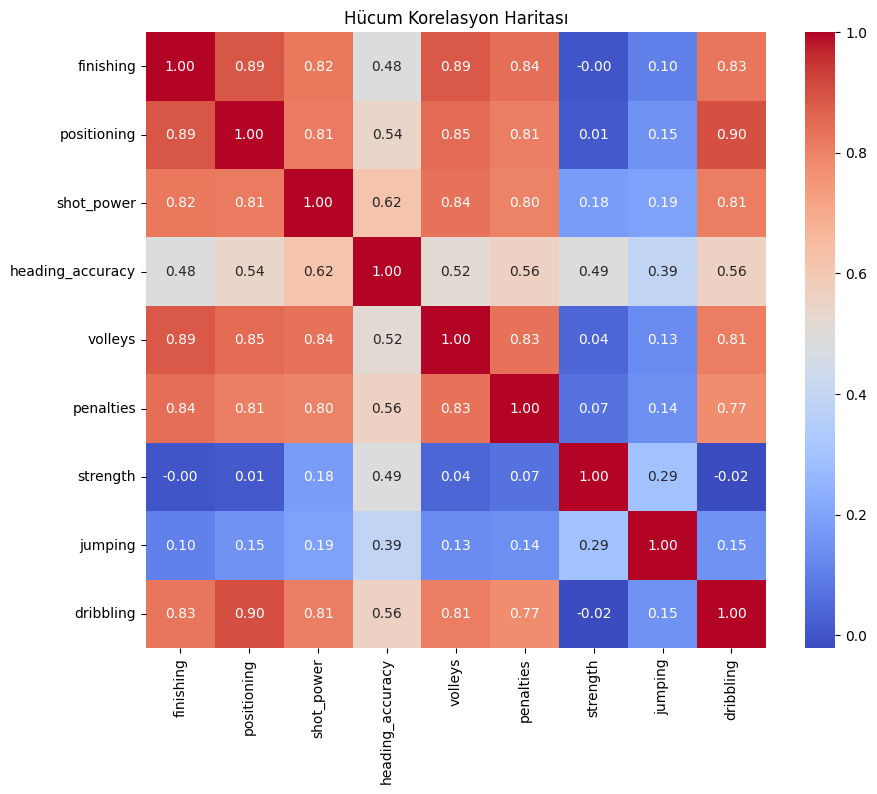

In [318]:
plt.figure(figsize=(10,8))
sns.heatmap(df[atk_feature].corr(),annot=True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Hücum Korelasyon Haritası")
plt.show()

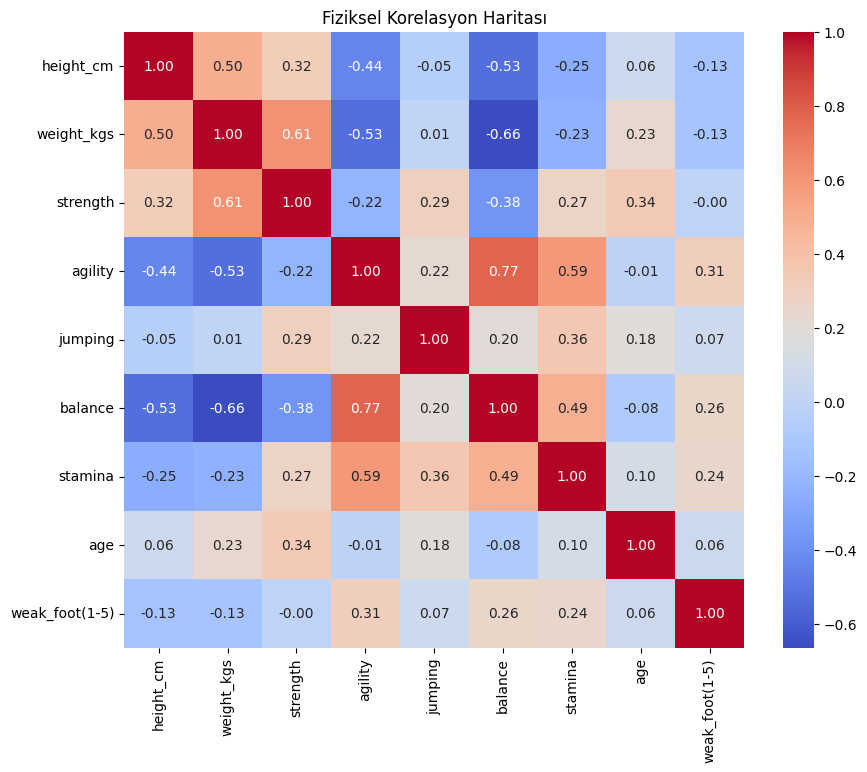

In [319]:
plt.figure(figsize=(10,8))
sns.heatmap(df[physical_feature].corr(),annot=True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Fiziksel Korelasyon Haritası")
plt.show()